# Open solar data

This notebook is to test and learn how to work with netCDF files obtained from Deep Space Climate Observatory (DSCOVR), which is a replacement for NASA's Advance Composition Explorer (ACE) spacecraft for monitoring solar wind from the Lagrange point L1.

The data is in netCDF format, which I am not familiarized with, thus I need to practice how to handle with this kind of data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import glob

It would be more useful to estimate the wind velocity _respect_ to the speed of sound. The speed of sound is defined as:
\begin{equation}
c_s = \left(\frac{\gamma kT}{\mu m_H}\right)^{1/2}
\end{equation}
Where $\gamma = 5/3$ is the adiabatic index for monoatomic gases (idr if is the same for ionized gases, it depends on the degrees of freedom). $k=1.38 \times 10^{-23}$ is the Boltzmann constant, $T$ is the temperature, $\mu=0.602$ is the mean atomic mass (and 0.602 is the value for solar chemical composition) and $m_H=1.67 \times 10^{-27}$ the hydrogen mass.

A decent approximation is given by:
\begin{equation}
c_s = (17.3~km/s)\left(\frac{\mathrm{T}}{10^4~\mathrm{K}}\right)^{1/2}
\end{equation}

Debo justificar esta última expresión con mis apuntes del posgrado (o corregirla). Done !!

./solar_data/2019-06-22/oe_f1m_dscovr_s20190620000000_e20190620235959_p20190621031949_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190617000000_e20190617235959_p20190618032010_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190622000000_e20190622235959_p20190623031927_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190616000000_e20190616235959_p20190617031943_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190621000000_e20190621235959_p20190622031916_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190619000000_e20190619235959_p20190620031916_pub.nc
./solar_data/2019-06-22/oe_f1m_dscovr_s20190618000000_e20190618235959_p20190619031953_pub.nc


/tmp/ipykernel_21002/3268699191.py:14: RuntimeWarning: invalid value encountered in sqrt
  cs = 17.3*np.sqrt(p_temperature/1e4)


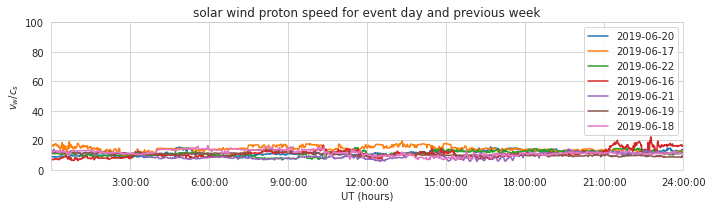

In [20]:
sns.set_style("whitegrid")
fn = glob.glob("./solar_data/2019-06-22/oe_f1m_dscovr_s*.nc")
#ds = nc.Dataset(fn)
fn2 = glob.glob("./solar_data/2019-06-22/oe_m1m_dscovr_s*.nc")
#ds2 = nc.Dataset(fn2)
labels = ["2019-06-20", "2019-06-17", "2019-06-22", "2019-06-16", "2019-06-21", "2019-06-19", "2019-06-18"]
for i, f in enumerate(fn):
    print(f)
    ds = nc.Dataset(f)
    time_raw = ds["time"][:]
    time = (time_raw - time_raw[0])/(3600.*1e3)
    p_speed = ds["proton_speed"][:]
    p_temperature = ds["proton_temperature"][:]
    cs = 17.3*np.sqrt(p_temperature/1e4)
    label = ""
#    if i == len(fn)-1:
#        label = "proton speed relative to speed of sound"
    plt.plot(time, p_speed/cs, label=labels[i])
plt.ylim(0, 100)
plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
plt.xlim(0, 24.)
plt.xlabel("UT (hours)")
plt.legend()
plt.ylabel(r"$v_w/c_s$")
plt.title("solar wind proton speed for event day and previous week")
plt.gcf().set_size_inches(10, 3)
plt.tight_layout()
plt.savefig("./solar_wind_figures/2019-06-22/solar_speed_all_wcs.pdf")

In [4]:
#print(ds)

In [5]:
#print(ds.variables.values())

## Data I may need

Following sample graphs from official website, the info I may need is:
- First graph
    - time (obviously)
    - bx_gsm
    - by_gsm
    - bz_gsm
    - bt
- Second graph
    - time
    - proton density
    - approx. dynamic pressure
- Third graph
    - time
    - proton speed
- Fourth graph
    - time
    . Proton Temperature

In [6]:
#time_raw = ds["time"][:]
#time = (time_raw - time_raw[0])/(3600.*1e3)
#p_speed = ds["proton_speed"][:]
#p_density = ds["proton_density"][:]
#proton_mass = 1.67e-27
#units_conversion = 1000**2*100**3*1e9
#p_dyn_pressure = 0.5*proton_mass*p_density*p_speed**2*units_conversion

Plot proton speed and compare with sample graph

In [7]:
#plt.plot(time, p_speed, label="proton speed")
#plt.ylim(200, 1200)
#plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
#plt.tight_layout()
#plt.xlim(0, 24.)
#plt.xlabel("UT (hours)")
#plt.legend()
#plt.ylabel("Speed (km/s)")
#plt.title("solar wind proton speed")
#plt.gcf().set_size_inches(10, 3)

In [8]:
#print(ds2)

In [9]:
#for var in ds2.variables.values():
#    print(var)

Load Magnetic field components

In [10]:
#t = (ds2["time"]-ds2["time"][0])/(1000*3600.) 
#bx =ds2["bx_gsm"] 
#by = ds2["by_gsm"] 
#bz = ds2["bz_gsm"] 
#bt=ds2["bt"] 

In [11]:
#plt.plot(t, bx, label="bx_gsm")
#plt.plot(t, by, label="by_gsm")
#plt.plot(t, bz, label="bz_gsm")
#plt.plot(t, bt, label="bt")
#plt.legend()
#plt.ylim(-13, 13)
#plt.xlim(0, 24.)
#plt.xlabel("UT (hours)")
#plt.ylabel("Mag (nT)")
#plt.title("Interplanetary Magnetic Field strength Bt and Bx, By, Bz components in Geocentric Solar Magnetospheric coordinates")
#plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
#plt.yticks([-12, -6, 0, 6, 12])
#plt.tight_layout()
#plt.gcf().set_size_inches(10, 3)

Now solar wind speed

In [12]:
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
#ax1.plot(time, p_density, label="proton density")
#ax2.plot(time, p_dyn_pressure, "r",label = "Approx. dynamic pressure")
#ax1.set_ylim(0, 50)
#ax2.set_ylim(0, 6)
#ax1.set_xticks([3, 6, 9, 12, 15,18, 21, 24])
#ax1.set_yticks([10, 20, 30, 40, 50])
#ax2.set_yticks([0.0, 1.2, 2.4, 3.6, 4.8, 6.0])
#ax1.set_xticklabels(["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
#plt.tight_layout()
#ax1.set_xlim(0, 24.)
#ax1.set_xlabel("UT (hours)")
#fig.legend()
#ax1.set_ylabel(r"Density $(cm^{-3})$")
#ax2.set_ylabel("Dynamic Pressure (nPa)")
#ax1.set_title("solar wind proton density and dynamic pressure")
#fig.set_size_inches(10, 3)

Finally the temperature

In [13]:
#p_temperature = ds["proton_temperature"][:]
#plt.plot(time, p_temperature, label="proton temperature")
#plt.ylim(1000, 1e7)
#plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
#plt.ticklabel_format(axis="y", style="sci")
#plt.yscale("log")
#plt.tight_layout()
#plt.xlim(0, 24.)
#plt.xlabel("UT (hours)")
#plt.legend()
#plt.ylabel("Temperature (K)")
#plt.title("solar wind proton temperature")
#plt.gcf().set_size_inches(10, 3)

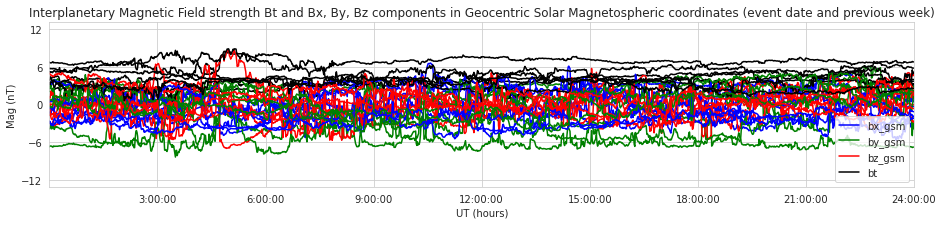

In [14]:
for i, f in enumerate(fn2):
    ds = nc.Dataset(f)
    t = (ds["time"]-ds["time"][0])/(1000*3600.)
    bx =ds["bx_gsm"] 
    by = ds["by_gsm"] 
    bz = ds["bz_gsm"] 
    bt=ds["bt"] 
    label1 = ""
    label2 = ""
    label3 = ""
    label4 = ""
    if i == len(fn)-1:
        label1 = "bx_gsm"
        label2 = "by_gsm"
        label3 = "bz_gsm"
        label4 = "bt"
    plt.plot(t, bx, "b", label=label1)
    plt.plot(t, by, "g", label=label2)
    plt.plot(t, bz, "r", label=label3)
    plt.plot(t, bt, "k", label=label4)
plt.legend()    
plt.ylim(-13, 13)
plt.xlim(0, 24.)
plt.xlabel("UT (hours)")
plt.ylabel("Mag (nT)")
plt.title("Interplanetary Magnetic Field strength Bt and Bx, By, Bz components in Geocentric Solar Magnetospheric coordinates (event date and previous week)")
plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
plt.yticks([-12, -6, 0, 6, 12])
plt.tight_layout()
plt.gcf().set_size_inches(15, 3)
plt.savefig("./solar_wind_figures/2019-06-22/solar-magnetic-field-all.pdf")

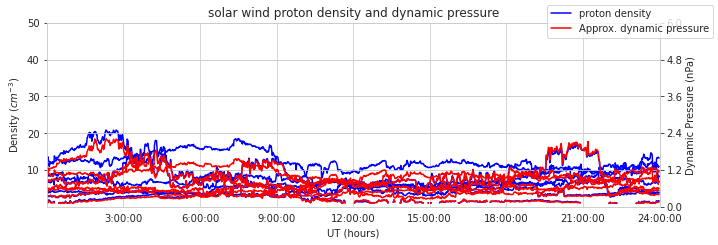

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
for i, f in enumerate(fn):
    ds = nc.Dataset(f)
    time_raw = ds["time"][:]
    time = (time_raw - time_raw[0])/(3600.*1e3)
    p_speed = ds["proton_speed"][:]
    p_density = ds["proton_density"][:]
    proton_mass = 1.67e-27
    units_conversion = 1000**2*100**3*1e9
    p_dyn_pressure = 0.5*proton_mass*p_density*p_speed**2*units_conversion
    label = ""
    label2 = ""
    if i == len(fn)-1:
        label = "proton density"
        label2 = "Approx. dynamic pressure"
    ax1.plot(time, p_density, "b", label=label)
    ax2.plot(time, p_dyn_pressure, "r", label = label2)
#ax1.set_ylim(0, 50)
#ax2.set_ylim(0, 6)
ax1.set_xticks([3, 6, 9, 12, 15,18, 21, 24])
ax1.set_yticks([10, 20, 30, 40, 50])
ax2.set_yticks([0.0, 1.2, 2.4, 3.6, 4.8, 6.0])
ax1.set_xticklabels(["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
plt.tight_layout()
ax1.set_xlim(0, 24.)
ax1.set_xlabel("UT (hours)")
fig.legend()
ax1.set_ylabel(r"Density $(cm^{-3})$")
ax2.set_ylabel("Dynamic Pressure (nPa)")
ax1.set_title("solar wind proton density and dynamic pressure")
fig.set_size_inches(10, 3)

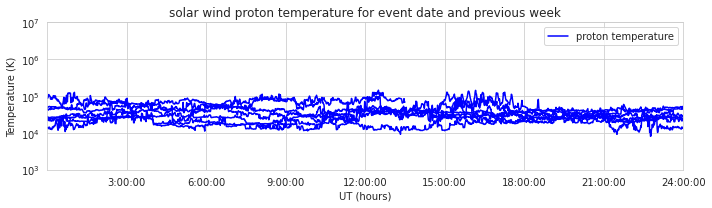

In [16]:
for i, f in enumerate(fn):
    ds = nc.Dataset(f)
    time_raw = ds["time"][:]
    time = (time_raw - time_raw[0])/(3600.*1e3)
    p_temperature = ds["proton_temperature"][:]
    label = ""
    if i == len(fn)-1:
        label = "proton temperature"
    plt.plot(time, p_temperature, "b", label=label)
plt.ylim(1000, 1e7)
plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
plt.ticklabel_format(axis="y", style="sci")
plt.yscale("log")
plt.xlim(0, 24.)
plt.xlabel("UT (hours)")
plt.legend()
plt.ylabel("Temperature (K)")
plt.title("solar wind proton temperature for event date and previous week")
plt.gcf().set_size_inches(10, 3)
plt.tight_layout()
plt.savefig("./solar_wind_figures/2019-06-22/solar-wind-temperature-all.pdf")

Estimate relative velocity of solar wind (current day minus previous day)

/tmp/ipykernel_21002/3256806769.py:8: RuntimeWarning: invalid value encountered in sqrt
  cs = 17.3*np.sqrt(p_temperature/1e4)


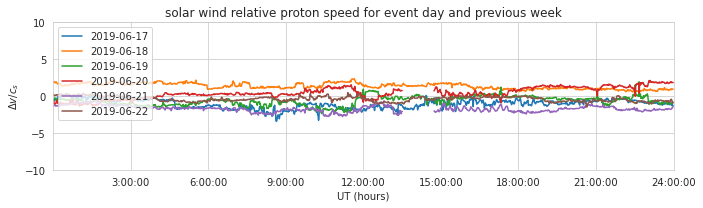

In [17]:
label =["", "2019-06-17", "2019-06-18", "2019-06-19", "2019-06-20", "2019-06-21", "2019-06-22"]
for i, f in enumerate(fn):
    ds = nc.Dataset(f)
    time_raw = ds["time"][:]
    time = (time_raw - time_raw[0])/(3600.*1e3)
    p_speed = ds["proton_speed"][:]
    p_temperature = ds["proton_temperature"][:]
    cs = 17.3*np.sqrt(p_temperature/1e4)
#    label=""
#    if i == len(fn)-1:
#        label = "relative proton speed"
    if i > 0:
        rel_speed = p_speed - p_speed_0
        plt.plot(time, rel_speed/cs, label=label[i])
    p_speed_0 = p_speed
plt.ylim(-10, 10)
plt.xticks([3, 6, 9, 12, 15,18, 21, 24], ["3:00:00", "6:00:00", "9:00:00", "12:00:00", "15:00:00", "18:00:00", "21:00:00", "24:00:00"])
plt.xlim(0, 24.)
plt.xlabel("UT (hours)")
plt.legend(loc="upper left")
plt.ylabel(r"$\Delta v /c_s$")
plt.title("solar wind relative proton speed for event day and previous week")
plt.gcf().set_size_inches(10, 3)
plt.tight_layout()
plt.savefig("./solar_wind_figures/2019-06-22/relative-speed-solar-wind-all.pdf")

Only need to check at which velocity shock waves can be produced. Probably the red and orange curve may produce such kind of shocks (if they reach the slower wind from the other day).

One question: How long takes for a supersonic wind (5 times the speed of sound) to reach Earth at 1 A.U at $1.5 \times 10^8~km$ in such way the mentioned shock waves are produced?

We must work with 2 possible scenarios, given the temperature boundaries: when the wind has a temperature of $10^5~K$ and $10^4~K$ to see in which case the fast wind has enough time to reach the slow one (assuming that the relative spped of the fast wind respect the slow one is 50 times the speed of sound)

In [18]:
cs1 = 17.3*np.sqrt(10)
cs2 = 17.3
v1 = 5*cs1
v2 = 5*cs2
x = 1.5e8
t1 = x/v1
t2 = x/v2
print(t1/3600., t2/3600.)

152.32551349558668 481.6955684007707


The resultant time is too long even in the scenario where the wind is faster. i.e, no shock waves due to the fact that a fast wind reaches a slow wind can be produced: the relative speed is too low for producing such phenomena